**Imports**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\Ellen\Desktop\Documents\Part-Time work\Projects\Linear Regression\Dataset\Ecommerce Customers')

In [14]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Outlier Detection**

In [152]:
import numpy as np
from scipy import stats

In [154]:
# Select numerical columns for outlier analysis
numeric_cols = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

In [156]:
# Z-Score Method
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = (z_scores > 3).any(axis=1)
print(f"Outliers detected using Z-score: {outliers_z.sum()}")

Outliers detected using Z-score: 8


In [158]:
# IQR Method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Outliers detected using IQR: {outliers_iqr.sum()}")

Outliers detected using IQR: 24


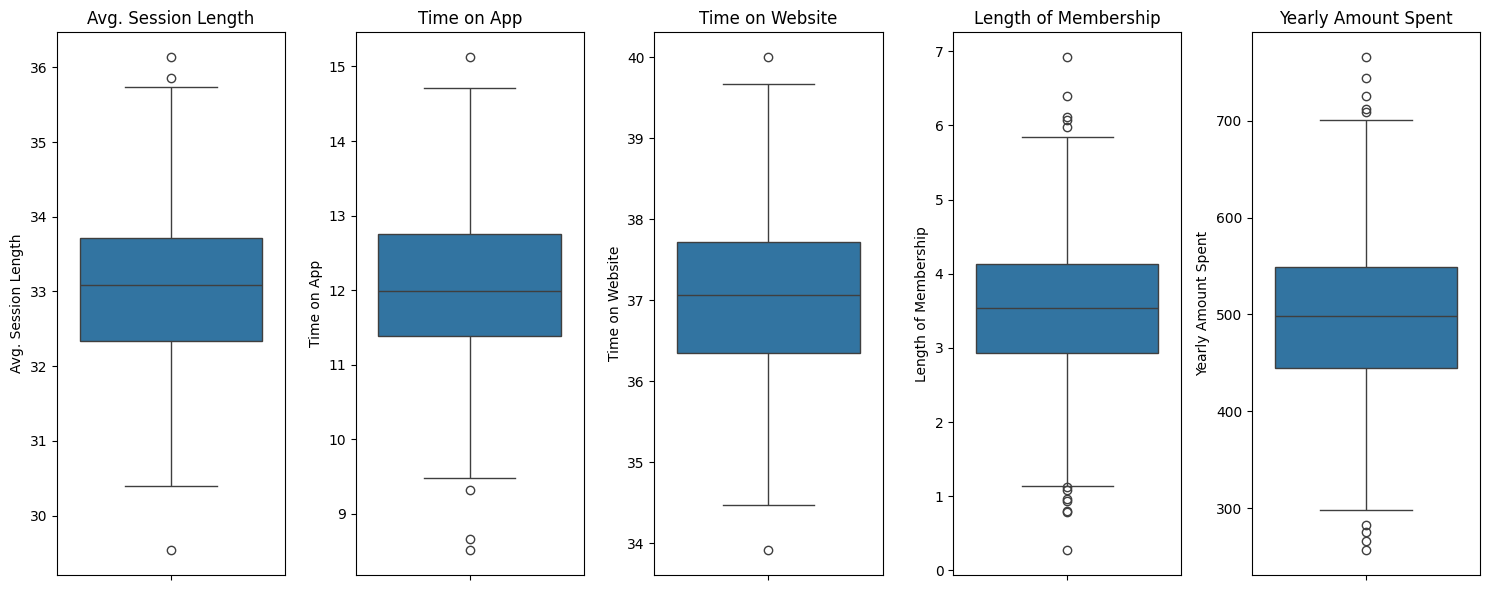

In [160]:
# Visualize using boxplots
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

# EDA

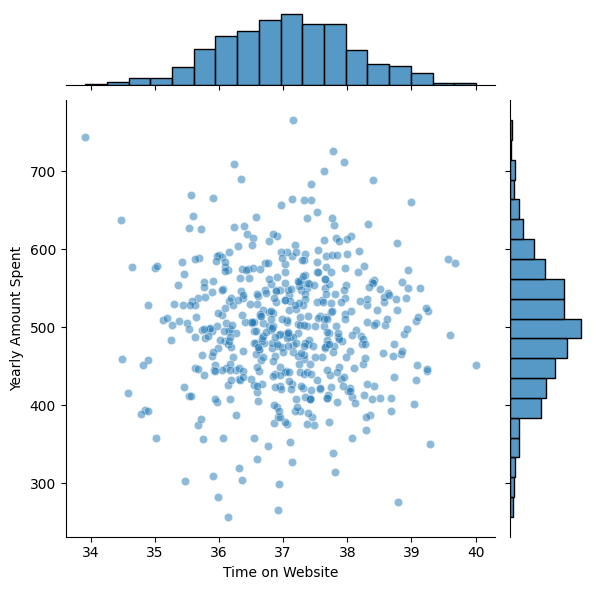

In [31]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.5)

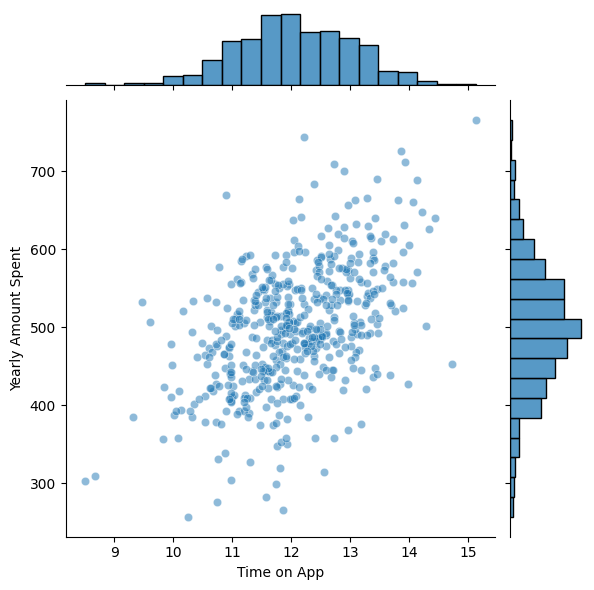

In [33]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)

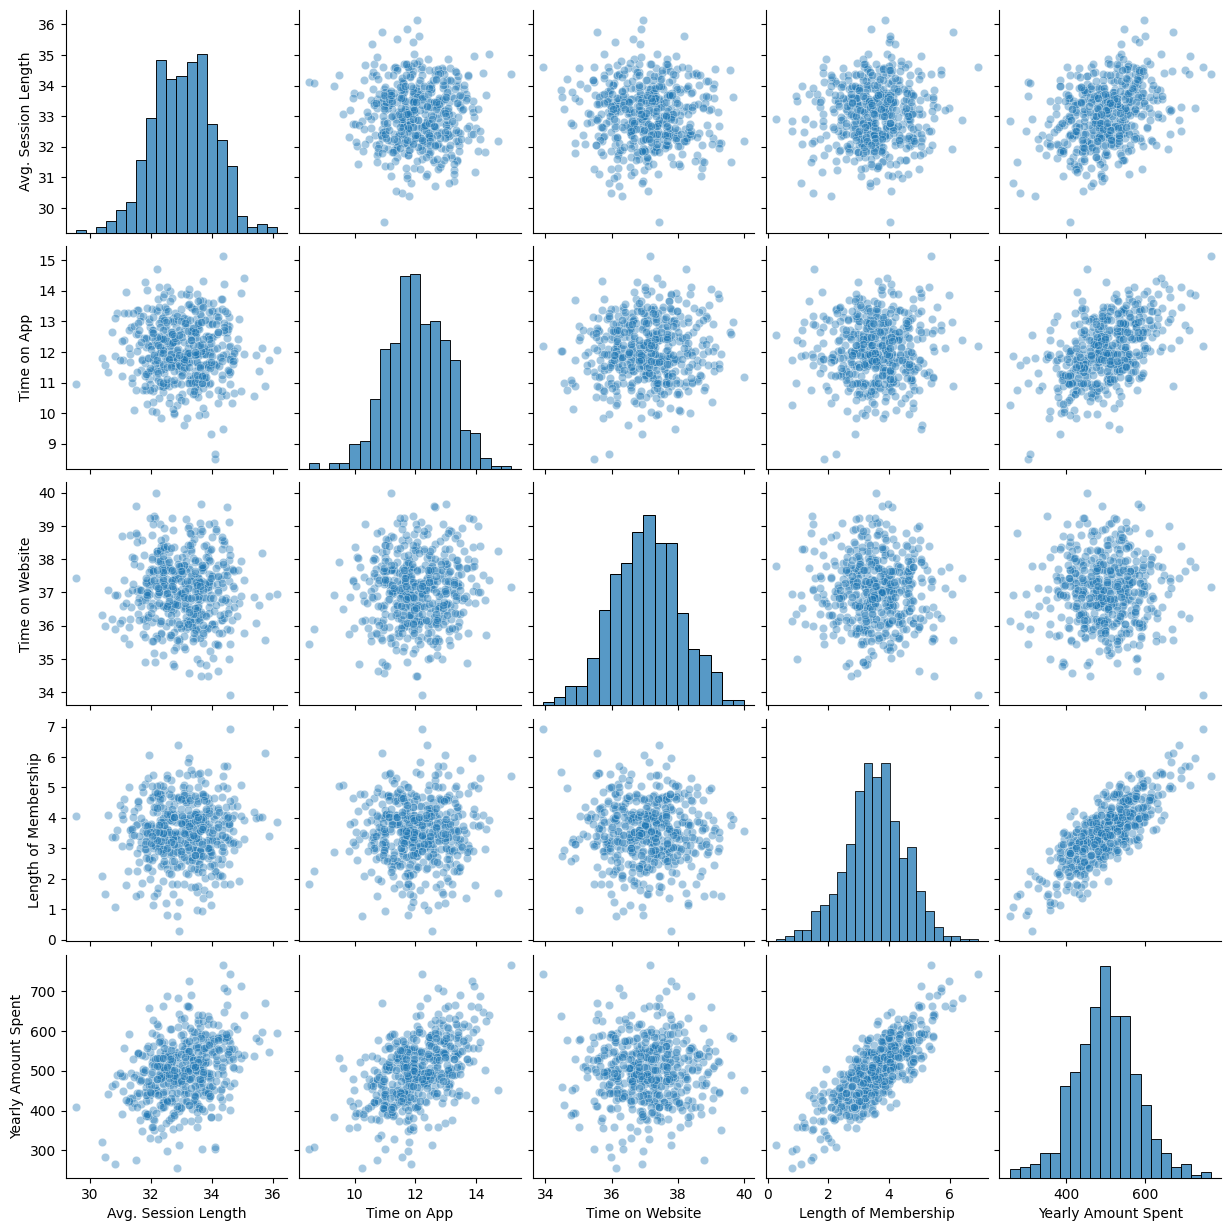

In [41]:
# Checking correlations
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4})

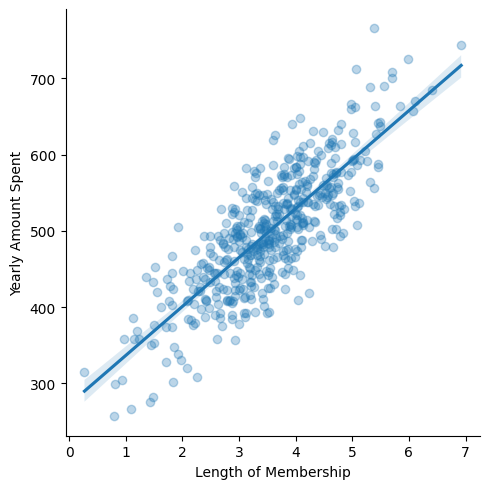

In [43]:
sns.lmplot(x ='Length of Membership',
           y ='Yearly Amount Spent',
           data = df,
           scatter_kws={'alpha':0.3})

# Simple Linear Regression Model

In [164]:
# Split data using Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
# Define X and y
X = df[['Length of Membership']]
y = df['Yearly Amount Spent']

In [168]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions

In [ ]:
predictions = model.predict(X_test)

In [175]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

**Checking the model**

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

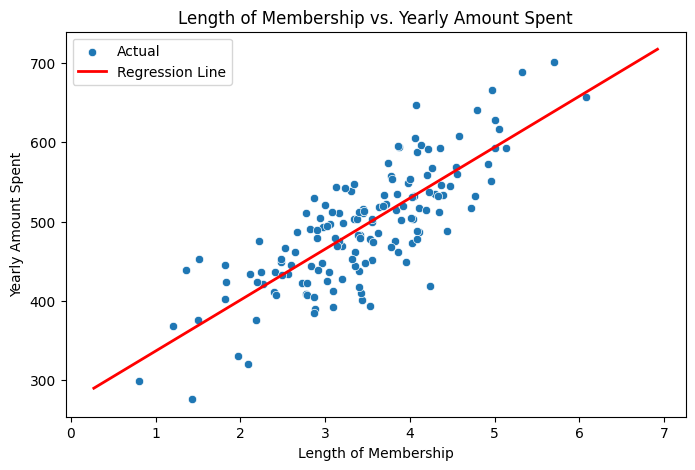

In [233]:
# Scatter plot of actual data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Length of Membership'], y=y_test, label='Actual')

# Create a smooth line using the regression formula: y = mx + b
x_range = np.linspace(X['Length of Membership'].min(), X['Length of Membership'].max(), 100)
y_line = model.intercept_ + model.coef_[0] * x_range

# Plot the regression line
plt.plot(x_range, y_line, color='red', label='Regression Line', linewidth=2)

plt.title('Length of Membership vs. Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()

In [180]:
# Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"R² Score: {r2_score(y_test, predictions):.3f}")
print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False):.2f}")

Intercept: 272.46800401052235
Coefficient: 64.29301160000902
R² Score: 0.981
RMSE: 10.19


C:\Users\Ellen\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [192]:
# Get R² on training set
train_predictions = model.predict(X_train)
print(f"Train R²: {r2_score(y_train, train_predictions):.3f}")

Train R²: 0.660


In [186]:
# Further R² validation check
from sklearn.model_selection import cross_val_score

In [184]:
# Perform 5-fold cross-validation using R² as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [188]:
# Print R² scores for each fold
print("Cross-validated R² scores for each fold:")
print(np.round(cv_scores, 3))

Cross-validated R² scores for each fold:
[0.561 0.718 0.615 0.654 0.696]


In [190]:
# Print average R² score
print(f"\nAverage Cross-validated R² score: {cv_scores.mean():.3f}")


Average Cross-validated R² score: 0.649


Cross-validation gives a more stable and honest estimate of model performance across multiple data splits.

**Residules Analysis**

In [198]:
import scipy.stats as stats

In [200]:
# Get residuals from the simple linear regression model
residuals = y_test - predictions

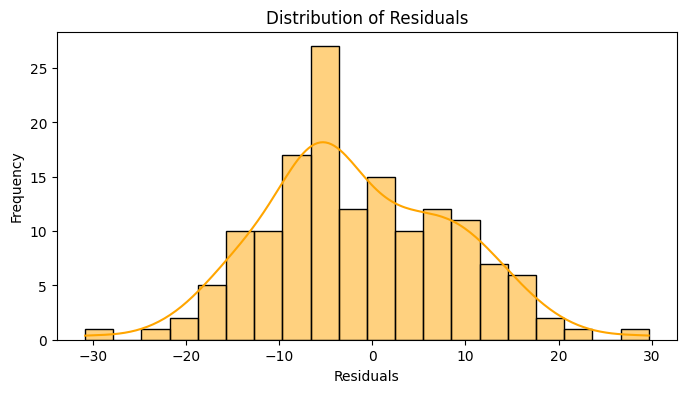

In [202]:
# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

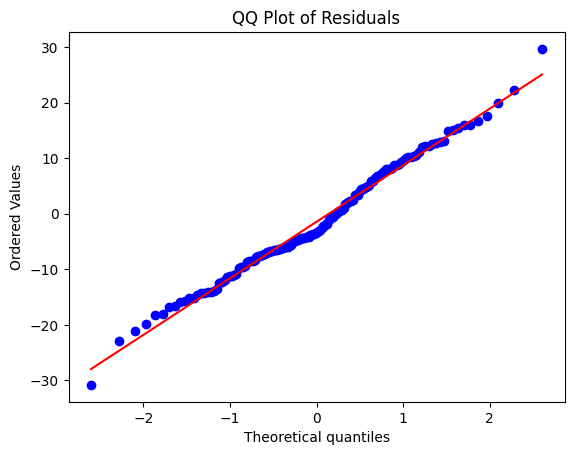

In [204]:
# QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

In [206]:
# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test: p-value = 0.4156


In [210]:
# Interpretation tip
if shapiro_test.pvalue > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals may not be normally distributed (p ≤ 0.05)")

Residuals appear to be normally distributed (p > 0.05)


**Final Insights**

The simple linear regression model revealed a strong linear relationship between Length of Membership and Yearly Amount Spent, with a coefficient of ~$64 and an R² of ~0.98 on the test set. Residual diagnostics confirmed that model assumptions hold: the residuals are symmetrically distributed and pass the Shapiro-Wilk normality test. A cross-validated R² of ~0.65 further validates the model’s generalizability across different data splits. These findings indicate that membership duration is a strong and consistent predictor of customer spend, making it a valuable metric for customer lifetime value modeling.

# Multi Linear Regression Model

In [49]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
y = df ['Yearly Amount Spent']


In [53]:
# Split to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [63]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [57]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


In [65]:
y_train

5      637.102448
116    479.231093
45     549.860590
16     457.847696
462    397.420584
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [67]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

# Creating Model

In [71]:
# Training the model
from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()

In [77]:
# Fitting the model
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
# Checking coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [87]:
# Creating dataframe to check coeffients
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


# Predictions

In [94]:
predictions = lm.predict(X_test)

In [96]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

**Checking Model Performance**

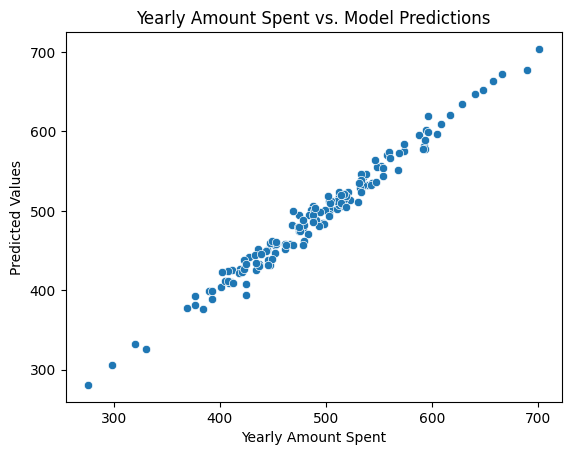

In [112]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(y=predictions, x=y_test)
plt.ylabel('Predicted Values')
plt.xlabel('Yearly Amount Spent')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()

# Evaluation of the Model

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [120]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432128
Mean Squared Error: 103.91554136503363
Root Mean Squared Error: 10.193897260863169


# Residules

In [128]:
residules = y_test - predictions

In [130]:
# Check how residules fall under distribution
residules

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

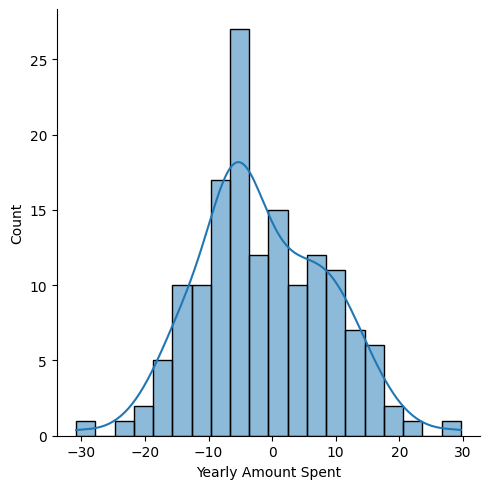

In [138]:
# Test for Normality
sns.displot(residules, bins=20, kde=True)

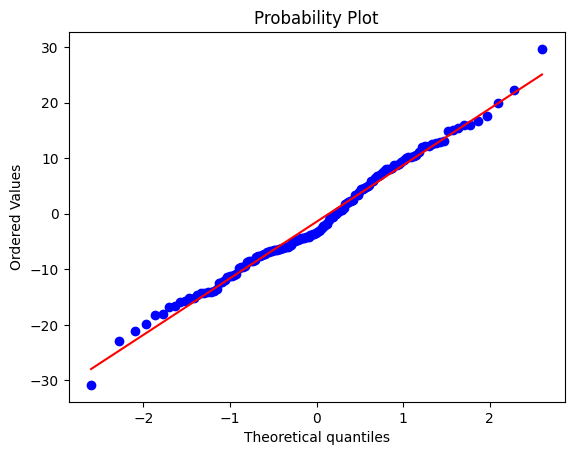

In [142]:
# Checking normal distribution of residules with QQplot
import pylab
import scipy.stats as stats

stats.probplot(residules, dist='norm', plot=pylab)
pylab.show()

# Conclusion
It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.